# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #23 Python Classes and Objects

In [1]:
%run video-00.py

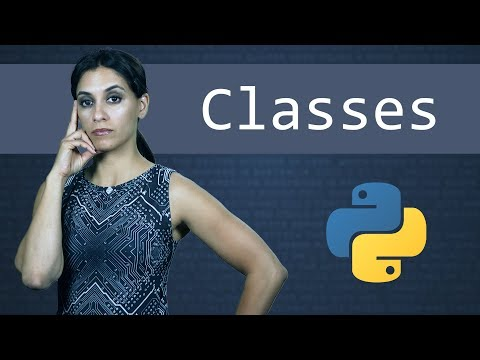

In [2]:
from IPython import display

video = display.YouTubeVideo('apACNr7DC_s')
video
display.HTML(f'<a href="{video.src}">link</a>')

Python supports an [OOP](https://en.wikipedia.org/wiki/Object-oriented_programming) paradigm. It starts with the `class` keyword:

In [3]:
help('class')

Class definitions
*****************

A class definition defines a class object (see section The standard
type hierarchy):

   classdef    ::= [decorators] "class" classname [inheritance] ":" suite
   inheritance ::= "(" [argument_list] ")"
   classname   ::= identifier

A class definition is an executable statement.  The inheritance list
usually gives a list of base classes (see Metaclasses for more
advanced uses), so each item in the list should evaluate to a class
object which allows subclassing.  Classes without an inheritance list
inherit, by default, from the base class "object"; hence,

   class Foo:
       pass

is equivalent to

   class Foo(object):
       pass

The class’s suite is then executed in a new execution frame (see
Naming and binding), using a newly created local namespace and the
original global namespace. (Usually, the suite contains mostly
function definitions.)  When the class’s suite finishes execution, its
execution frame is discarded but its local namespace i

In [4]:
class User:
    pass

We have defined an empty `class` called `User` in the same manner [we defined a function](https://github.com/BryanWilhite/guido-van-r-snake/blob/master/socratica/video-12.ipynb):

In [5]:
def f():
    pass

Let us instantiate `User`:

In [6]:
user1 = User()

Just like in the world of JavaScript, in Python, we often compare `dict` with an instance of a class. Fundamentally, it is because an instance of a class has a `__dict__` property:

In [7]:
type(user1.__dict__)
user1.__dict__

dict

{}

In the same manner [we can index-assign 2-tuple pairs](https://github.com/BryanWilhite/guido-van-r-snake/blob/master/socratica/video-15.ipynb) to `dict`, we can dynamically add properties to an instance of an object:

In [8]:
user1.first_name = 'Dave'
user1.__dict__

{'first_name': 'Dave'}

Do remember that we are assigning this property to an _instance_ of `User`. When we instantiate another `User`, the dynamically-added property is not there:

In [9]:
user2 = User()
user2.__dict__

{}

We can also dynamically add functions to an instance of `User`:

In [10]:
user1.my_empty_function = f
user1.my_empty_function() # does nothing, just like `f`
user1.__dict__

{'first_name': 'Dave', 'my_empty_function': <function __main__.f()>}

`.my_empty_function()` is a _method_ of the class instance with [naming coventions](https://www.python.org/dev/peps/pep-0008/) according to Pythonic culture.

To share properties and methods for _all_ instances of a class, they must be defined _within_ the class, making _members_ of the class.

In [11]:
class User:
    def my_empty_function():
        pass

    full_name = None # properties must be initialized
                     # or there will be a syntax error
    birthday = None  # these properties, by the way, are static


Now we have defined `User` to be a class with one method and two properties:

In [12]:
user1 = User()
user2 = User()

[member for member in user1.__dir__() if not(member.startswith('_'))]
[member for member in user2.__dir__() if not(member.startswith('_'))]

['my_empty_function', 'full_name', 'birthday']

['my_empty_function', 'full_name', 'birthday']

We see that both instances share the same members by looking at `__dir__` [📖 [docs](https://docs.python.org/3/library/functions.html#dir)] instead of `__dict__` [📖 [docs](https://docs.python.org/3/library/stdtypes.html#object.__dict__)]. Both instances have no items in `__dict__` because there are no dynamic members added:

In [13]:
user1.__dict__
user2.__dict__

{}

{}

These ‘dynamic members’ are called _instance attribute references_, [according to the documentation](https://docs.python.org/3/tutorial/classes.html?highlight=class#instance-objects).

The `__dir__` property is used with the `dir()` function which implies the following:

In [14]:
[member for member in dir(user1) if not(member.startswith('_'))]
[member for member in dir(user2) if not(member.startswith('_'))]

['birthday', 'full_name', 'my_empty_function']

['birthday', 'full_name', 'my_empty_function']

### Initializing Class Properties During Construction

The construction or _initialization_ of a class can be defined with special method, `__init__()` [📖 [docs](https://docs.python.org/3/reference/datamodel.html?highlight=__init__#object.__init__)]. The first argument of `__init__()` is `self`, representing the instance of the class. `self` can be used to distinguish class properties from initialization arguments:

In [15]:
class User:
    def __init__(self, full_name, birthday):
        self.full_name = full_name
        self.birthday = birthday

user = User('Dave Bowman', '19710315')

user.full_name
user.birthday

'Dave Bowman'

'19710315'

In [16]:
[member for member in dir(user) if not(member.startswith('_'))]

['birthday', 'full_name']

### `self` Can Be Used As the First Argument of Any Class Method

Let us redefine `User` yet again with a method that returns `full_name` as a tuple of first name and last name:

In [17]:
class User:
    def __init__(self, full_name, birthday):
        self.full_name = full_name
        self.birthday = birthday
    
    def get_name_data(self):
        name_data = self.full_name.split(' ')

        return (name_data[0], name_data[-1])
    
user = User('Dave Bowman', '19710315')
user.get_name_data()

('Dave', 'Bowman')

We see that `self` is used to access other members of the class.

### `class` and `object`

Every instance of a class is derived from `object` [📖 [docs](https://docs.python.org/3/reference/compound_stmts.html#class-definitions)] which implies:

In [18]:
class Foo:
    pass

is the same as:

In [19]:
class Foo(object):
    pass

The latter explicitly declares that Foo [inherits](https://docs.python.org/3/tutorial/classes.html?highlight=inheritance#inheritance) from `object`.

### Static Class Methods

We have seen how to share properties for each instance of a class with `self`. We have seen how to define static properties in a class. Let’s see this again in one place:

In [20]:
class MyClass:
    def __init__(self, my_instance_property):
        self.my_instance_property = my_instance_property

    def __str__(self): # adding support for `print()`
        return f'''
    my_instance_property: {self.my_instance_property}
    my_static_property: {self.my_static_property}
        '''

    my_static_property = 42

my_instance = MyClass(43)
my_other_instance = MyClass(4.3)

print('my_instance:', my_instance)
print('my_other_instance:', my_other_instance)

print('set static property...\n')
MyClass.my_static_property = 42000

print('my_instance:', my_instance)
print('my_other_instance:', my_other_instance)


my_instance: 
    my_instance_property: 43
    my_static_property: 42
        
my_other_instance: 
    my_instance_property: 4.3
    my_static_property: 42
        
set static property...

my_instance: 
    my_instance_property: 43
    my_static_property: 42000
        
my_other_instance: 
    my_instance_property: 4.3
    my_static_property: 42000
        


What about static methods? This feature is tacked on with the `@staticmethod` decorator [📖 [docs](https://docs.python.org/3/library/functions.html#staticmethod)]:

In [21]:
class MyClass:
    def __init__(self, my_instance_property):
        self.my_instance_property = my_instance_property

    def __str__(self): # adding support for `print()`
        return f'''
    my_instance_property: {self.my_instance_property}
    my_static_property: {self.my_static_property}
        '''

    my_static_property = 42

    @staticmethod
    def my_static_method(x, y):
        return (x + y)


In [22]:
MyClass.my_static_method(1, 1)

2

In a static method, the conventional variable `self` will not represent an instance of the class.